https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428

In [13]:
import warnings; 
warnings.simplefilter('ignore')
from IPython.display import Image
from IPython.core.display import HTML 

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

Logarithmic Loss
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.

The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

You can learn more about logarithmic on the Loss functions for classification Wikipedia article.

Below is an example of calculating logloss for Logistic regression predictions on the Pima Indians onset of diabetes dataset.

Let’s start with 10 random points:
x = [-2.2, -1.4, -0.8, 0.2, 0.4, 0.8, 1.2, 2.2, 2.9, 4.6]

Now, let’s assign some colors to our points: red and green. These are our labels.
    
So, our classification problem is quite straightforward: given our feature x, we need to predict its label: red or green.
Since this is a binary classification, we can also pose this problem as: “is the point green” or, even better, “what is the probability of the point being green”? Ideally, green points would have a probability of 1.0 (of being green), while red points would have a probability of 0.0 (of being green).
In this setting, green points belong to the positive class (YES, they are green), while red points belong to the negative class (NO, they are not green).
If we fit a model to perform this classification, it will predict a probability of being green to each one of our points. Given what we know about the color of the points, how can we evaluate how good (or bad) are the predicted probabilities? This is the whole purpose of the loss function! It should return high values for bad predictions and low values for good predictions.
For a binary classification like our example, the typical loss function is the binary cross-entropy / log loss.
Loss Function: Binary Cross-Entropy / Log Loss
If you look this loss function up, this is what you’ll find:
Image(url= "C:\Users\prudi\Documents\GitHub\Code\2019\Algorithms\Performance Metric\LogLoss.png")
Binary Cross-Entropy / Log Loss
where y is the label (1 for green points and 0 for red points) and p(y) is the predicted probability of the point being green for all N points.

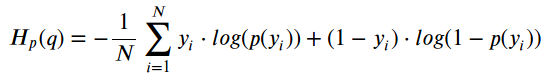

In [10]:
#Image(url= "C:\Users\prudi\Documents\GitHub\Code\2019\Algorithms\Performance Metric\LogLoss.png")

PATH = "C:\\Users\\prudi\\Documents\\GitHub\\Code\\2019\\Algorithms\\Performance Metrics\\"
Image(filename = PATH + "LogLoss.png", width=500, height=500)

In [24]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: ",results.mean(), results.std())

Logloss:  -0.4926551111482703 0.046890273308686774


In [25]:
from sklearn.metrics import log_loss
model.fit(X,Y)
results=model.predict_proba(X)
loss=log_loss(Y,results)
print('Log loss is',loss)

Log loss is 0.48013904734169494
